# TB outcomes across the globe #

Within this code, datasets taken from WHO and World bank are investigated to define relationships between GDP expendature in public health and TB treatment outcomes in countries and regions across the globe. This is important as TB affects millions of people every year, and a higher success rate of treatment would save several lives and decrease economic strains that come with failed treatments.  Here, the information is sorted into a single dataframe, analysed visually and then a model is predicted to see whether predictions can be made using the variables.

In [1]:
import pandas as pd # Import pandas

TB_data = pd.read_csv("TB_outcomes.csv", index_col = "country") # Read in the csv file

TB_data

,iso2,iso3,iso_numeric,g_whoregion,year,cohort_type,age_group,sex,coh,succ,fail,died,lost,neval,tsr
country,,,,,,,,,,,,,,,
Afghanistan,AF,AFG,4,EMR,2018,newrel,0-14,a,10461,10027.0,NaN,NaN,NaN,NaN,96.0
Albania,AL,ALB,8,EUR,2010,newrel,0-14,a,18,17.0,0.0,0.0,0.0,1.0,94.0
Albania,AL,ALB,8,EUR,2011,newrel,0-14,a,7,7.0,0.0,0.0,0.0,0.0,100.0
Albania,AL,ALB,8,EUR,2012,newrel,0-14,a,3,3.0,0.0,0.0,0.0,0.0,100.0
Albania,AL,ALB,8,EUR,2013,newrel,0-14,a,19,18.0,0.0,0.0,1.0,0.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZW,ZWE,716,AFR,2020,newrel,a,f,5754,5121.0,35.0,493.0,87.0,18.0,89.0
Zimbabwe,ZW,ZWE,716,AFR,2020,newrel,a,m,10302,9042.0,67.0,923.0,213.0,57.0,88.0
Zimbabwe,ZW,ZWE,716,AFR,2021,newrel,0-14,a,922,831.0,NaN,NaN,NaN,NaN,90.0


### Sorting out the messy dataset ###

In [2]:
# Delete the unimportant columns/columns without enough data to analyse

columns_to_delete =["iso2", "iso_numeric", "year", "cohort_type", "age_group", "sex", "tsr"]

TB_data = TB_data.drop(columns = columns_to_delete)

TB_data

,iso3,g_whoregion,coh,succ,fail,died,lost,neval
country,,,,,,,,
Afghanistan,AFG,EMR,10461,10027.0,NaN,NaN,NaN,NaN
Albania,ALB,EUR,18,17.0,0.0,0.0,0.0,1.0
Albania,ALB,EUR,7,7.0,0.0,0.0,0.0,0.0
Albania,ALB,EUR,3,3.0,0.0,0.0,0.0,0.0
Albania,ALB,EUR,19,18.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,AFR,5754,5121.0,35.0,493.0,87.0,18.0
Zimbabwe,ZWE,AFR,10302,9042.0,67.0,923.0,213.0,57.0
Zimbabwe,ZWE,AFR,922,831.0,NaN,NaN,NaN,NaN


In [3]:
# Rename columns to better names

TB_data = TB_data.rename(columns = {"coh":"no_of_cases",
                          "lost":"no_data",
                          "neval":"not_eval",
                          "g_whoregion":"region",
                          "iso3":"country_code"})


In [4]:
# Combine country rows

# Group by "country" and aggregate the data
TB_data = TB_data.groupby('country').agg({
    "region": "first",
    "country_code": "first",
    "no_of_cases": "sum",
    "succ": "sum",
    "fail": "sum",
    "died": "sum",
    "no_data": "sum",
    "not_eval": "sum",
}).reset_index()

# Set the "country" column as the index
TB_data = TB_data.set_index("country")

TB_data

,region,country_code,no_of_cases,succ,fail,died,no_data,not_eval
country,,,,,,,,
Afghanistan,EMR,AFG,10461,10027.0,0.0,0.0,0.0,0.0
Albania,EUR,ALB,132,126.0,0.0,0.0,2.0,4.0
American Samoa,WPR,ASM,0,0.0,0.0,0.0,0.0,0.0
Andorra,EUR,AND,0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,AMR,ATG,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Viet Nam,WPR,VNM,285504,258478.0,1753.0,6682.0,7807.0,9348.0
Wallis and Futuna,WPR,WLF,0,0.0,0.0,0.0,0.0,0.0
Zambia,AFR,ZMB,101371,92821.0,313.0,4300.0,1947.0,974.0


In [5]:
# Drop no_data and not_eval columns to make a new unknown column (the original dataset is incomplete - the columns do not correctly add up to )
TB_data = TB_data.drop(['no_data', 'not_eval'], axis=1) 

TB_data["unknown"] = TB_data["no_of_cases"] - TB_data["succ"] - TB_data["fail"] - TB_data["died"]

TB_data

,region,country_code,no_of_cases,succ,fail,died,unknown
country,,,,,,,
Afghanistan,EMR,AFG,10461,10027.0,0.0,0.0,434.0
Albania,EUR,ALB,132,126.0,0.0,0.0,6.0
American Samoa,WPR,ASM,0,0.0,0.0,0.0,0.0
Andorra,EUR,AND,0,0.0,0.0,0.0,0.0
Antigua and Barbuda,AMR,ATG,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Viet Nam,WPR,VNM,285504,258478.0,1753.0,6682.0,18591.0
Wallis and Futuna,WPR,WLF,0,0.0,0.0,0.0,0.0
Zambia,AFR,ZMB,101371,92821.0,313.0,4300.0,3937.0


In [6]:
# Recalculate the success rate of TB treatment per country as a percentage under the variable "success_rate"
TB_data["success_rate"] = (TB_data["succ"] / TB_data["no_of_cases"]) * 100

TB_data


,region,country_code,no_of_cases,succ,fail,died,unknown,success_rate
country,,,,,,,,
Afghanistan,EMR,AFG,10461,10027.0,0.0,0.0,434.0,95.851257
Albania,EUR,ALB,132,126.0,0.0,0.0,6.0,95.454545
American Samoa,WPR,ASM,0,0.0,0.0,0.0,0.0,NaN
Andorra,EUR,AND,0,0.0,0.0,0.0,0.0,NaN
Antigua and Barbuda,AMR,ATG,1,1.0,0.0,0.0,0.0,100.000000
...,...,...,...,...,...,...,...,...
Viet Nam,WPR,VNM,285504,258478.0,1753.0,6682.0,18591.0,90.533933
Wallis and Futuna,WPR,WLF,0,0.0,0.0,0.0,0.0,NaN
Zambia,AFR,ZMB,101371,92821.0,313.0,4300.0,3937.0,91.565635


### Data visualisation ###

Text(0, 0.5, 'Average Success Rate')

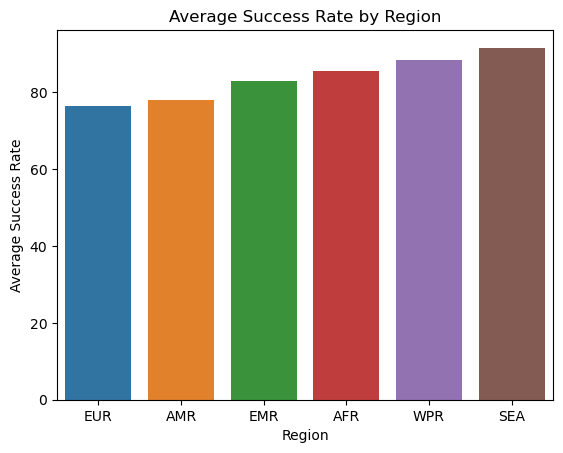

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_success_rate_per_region = TB_data.groupby("region")["success_rate"].mean().sort_values() # Takes the data from region and success rates, groups together the success rates for each region into their averages.

sns.barplot(
    x=avg_success_rate_per_region.index,
    y=avg_success_rate_per_region.values,
    ) # Make a bar graph of average success rate per region

plt.title("Average Success Rate by Region")
plt.xlabel("Region")
plt.ylabel("Average Success Rate") # Set the labels of the graph


This data does not show many significant differences between success rate of tb treatment within regions. We can add in some world bank data showing the percentage of gdp allocated to health expendature in each country to see if we can do some comparisons. The data that will be used can be imported from: "https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS?name_desc=false" as csv files. It will be downloaded as a folder and the 2 CSV files we are interested in are Metadata_country_API and API_SH.XPD.CHEX etc.

In [8]:
# Import the csv files of interest

Income_group = pd.read_csv("Metadata_Country_API_SH.XPD.CHEX.GD.ZS_DS2_en_csv_v2_6226442.csv")

Income_group

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [9]:
# Add the IncomeGroup column into our TB dataframe

Income_group = Income_group.rename(columns={"Country Code": "country_code", "IncomeGroup": "income_group"}) #Columns are renamed so that they are uniform between datasets

# Dataframes need to be sorted by their country code
Income_group = Income_group.sort_values(by='country_code')
TB_data = TB_data.sort_values(by='country_code')

# Reset the index to bring 'country' column back so that it is not lost in the merge
TB_data = TB_data.reset_index()

# Merge the DataFrames based on 'country_code'
TB_data = pd.merge(TB_data, Income_group[['country_code', 'income_group']], left_on='country_code', right_on='country_code', how='left')

TB_data = TB_data.dropna(subset=['success_rate']) # Removes NaN values so that countries that are not originally in the dataset will not be added (also gets rid of the countries that did not record any data originally)

# Set 'country' back as the index
TB_data = TB_data.set_index('country')

TB_data



,region,country_code,no_of_cases,succ,fail,died,unknown,success_rate,income_group
country,,,,,,,,,
Afghanistan,EMR,AFG,10461,10027.0,0.0,0.0,434.0,95.851257,Low income
Albania,EUR,ALB,132,126.0,0.0,0.0,6.0,95.454545,Upper middle income
United Arab Emirates,EMR,ARE,12,8.0,0.0,0.0,4.0,66.666667,High income
Argentina,AMR,ARG,7563,4240.0,8.0,84.0,3231.0,56.062409,Upper middle income
Armenia,EUR,ARM,383,334.0,7.0,2.0,40.0,87.206266,Upper middle income
...,...,...,...,...,...,...,...,...,...
Vanuatu,WPR,VUT,35,33.0,0.0,0.0,2.0,94.285714,Lower middle income
Samoa,WPR,WSM,2,2.0,0.0,0.0,0.0,100.000000,Lower middle income
South Africa,AFR,ZAF,597200,472719.0,4211.0,42218.0,78052.0,79.155894,Upper middle income


In [10]:
# Read in the gdp data

GDP_data = pd.read_csv("API_SH.XPD.CHEX.GD.ZS_DS2_en_csv_v2_6226442.csv", skiprows= 4, index_col = "Country Name")

GDP_data

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.839963,6.150307,6.064641,5.965650,5.819182,5.804298,5.855497,NaN,NaN,NaN
Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.528878,10.105348,11.818590,12.620817,14.208419,14.831319,15.533614,16.826062,NaN,NaN
Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.595070,3.820661,3.807274,3.781455,3.395626,3.346485,3.834650,NaN,NaN,NaN
Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.434129,2.605795,2.713150,2.793838,2.588796,2.655926,2.911835,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",YEM,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.841805,4.252857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,ZAF,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.871366,8.053042,8.079594,7.977112,8.062900,8.242583,8.583298,NaN,NaN,NaN


In [11]:
# Our tb data is from 2010 onwards, so we will calculate the average GDP expenditure from that date onwards for each country.

gdp_columns = GDP_data.loc[:, "2010":"2022"] # Make an object of the values from 2010 - 2022

GDP_data["mean_gdp_2010_onwards"] = gdp_columns.mean(axis=1, skipna=True) # Make a new row with the means of GDP for each country, excluding NaN values.

GDP_data

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67,mean_gdp_2010_onwards
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.150307,6.064641,5.965650,5.819182,5.804298,5.855497,NaN,NaN,NaN,6.057638
Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.105348,11.818590,12.620817,14.208419,14.831319,15.533614,16.826062,NaN,NaN,11.608980
Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.820661,3.807274,3.781455,3.395626,3.346485,3.834650,NaN,NaN,NaN,3.612507
Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.605795,2.713150,2.793838,2.588796,2.655926,2.911835,NaN,NaN,NaN,2.652068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",YEM,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.252857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863382
South Africa,ZAF,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.053042,8.079594,7.977112,8.062900,8.242583,8.583298,NaN,NaN,NaN,8.065030


In [12]:
# Add the mean GDP to the TB dataset
GDP_data = GDP_data.rename(columns = {"Country Code":"country_code", "mean_gdp_2010_onwards":"mean_gdp"}) # Rename so column is identical to the one in the TB data.

# Dataframes need to be sorted by their country code
Income_group = GDP_data.sort_values(by='country_code')
TB_data = TB_data.sort_values(by='country_code')

# Reset the index to bring 'country' column back so that it is not lost in the merge
TB_data = TB_data.reset_index()

TB_data = TB_data.dropna(subset=['success_rate']) # Removes nan values so that countries that are not originally in the dataset will not be added

TB_data = TB_data.merge(GDP_data[['country_code', 'mean_gdp']], on='country_code', how="left")

# Set 'country' back as the index
TB_data = TB_data.set_index('country')

TB_data

,region,country_code,no_of_cases,succ,fail,died,unknown,success_rate,income_group,mean_gdp
country,,,,,,,,,,
Afghanistan,EMR,AFG,10461,10027.0,0.0,0.0,434.0,95.851257,Low income,11.608980
Albania,EUR,ALB,132,126.0,0.0,0.0,6.0,95.454545,Upper middle income,6.391161
United Arab Emirates,EMR,ARE,12,8.0,0.0,0.0,4.0,66.666667,High income,3.947564
Argentina,AMR,ARG,7563,4240.0,8.0,84.0,3231.0,56.062409,Upper middle income,9.706535
Armenia,EUR,ARM,383,334.0,7.0,2.0,40.0,87.206266,Upper middle income,10.209647
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,WPR,VUT,35,33.0,0.0,0.0,2.0,94.285714,Lower middle income,3.610662
Samoa,WPR,WSM,2,2.0,0.0,0.0,0.0,100.000000,Lower middle income,5.601740
South Africa,AFR,ZAF,597200,472719.0,4211.0,42218.0,78052.0,79.155894,Upper middle income,8.065030


<Axes: xlabel='mean_gdp', ylabel='success_rate'>

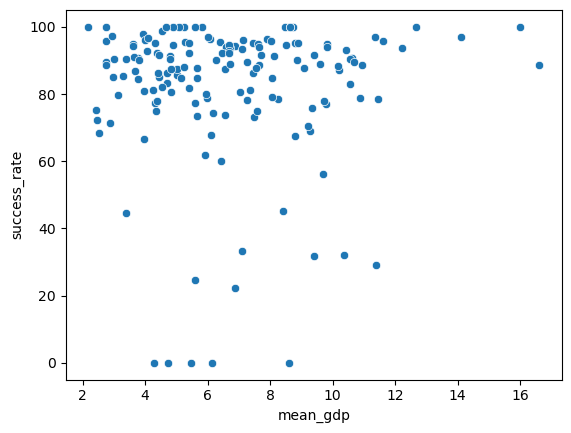

In [13]:
sns.scatterplot(
    data = TB_data,
    x = "mean_gdp",
    y = "success_rate")

Here we can see that there is no correlation between success rate and mean gdp when we look at datapoints from each country. This may be because whilst there may be the same amount of GDP being put into public health, different countries may have different priorities as to which areas of health they invest in.

<Axes: xlabel='income_group', ylabel='success_rate'>

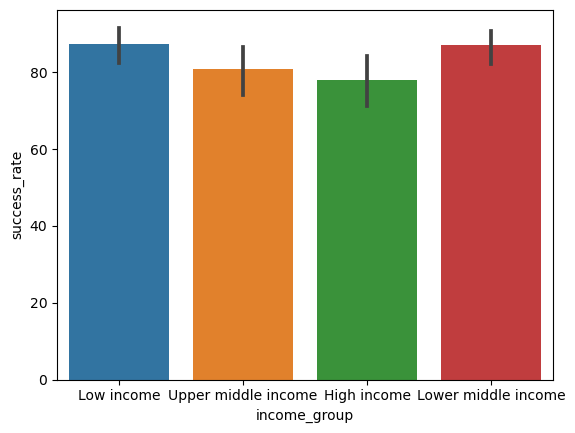

In [14]:
sns.barplot(
    data=TB_data,
    x = "income_group",
    y = "success_rate")

Here, we surprisingly see that lower income countries are slightly better at treating TB than higher income countries. This may be because in higher income countries, TB is more likely to be multi-drug resistant and therefore harder to treat (Falzon et al., 2015).

<Axes: >

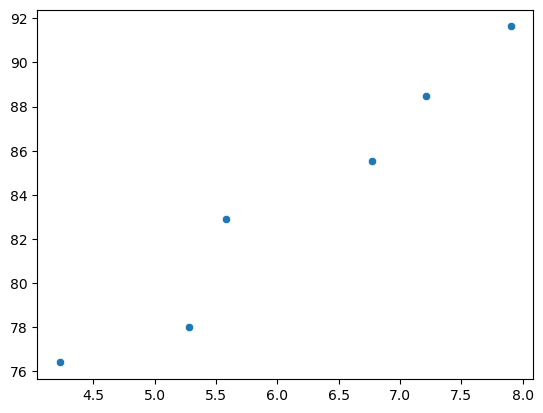

In [15]:
avg_GDP_per_region = TB_data.groupby("region")["mean_gdp"].mean().sort_values() # Takes the data from region and success rates, groups together the success rates for each region into their averages.

sns.scatterplot(
    x=avg_GDP_per_region.values,
    y=avg_success_rate_per_region.values,
    ) # Make a bar graph of average success rate per region


There is a clear positive correlation between GDP percentage invested in public health and the success rate of TB treatment when we look at it from a broader perspective (region). Therefore, we could potentially make a model that could predict the success rate of TB treatment depending on the % GDP a region puts into public health.

### Machine Learning ###

In [16]:
X = avg_GDP_per_region.values # Setting x and y values
y = avg_success_rate_per_region.values

In [17]:
from sklearn.model_selection import train_test_split # Split data into training and testing set.
from sklearn.linear_model import LinearRegression
import numpy as np
# Reshape X to a 2D array if it's a single feature
X = np.array(X).reshape(-1, 1)

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [19]:
model.score(test_X, test_y)

-7.546107751837214

This model score is most likely really low because there is not enough data points to train the model. It would potentially be more successful if a dataset was created that looked at how much each country invested in TB treatment specifically to create a more accurate model. Furthermore, a differentiation between multi-drug resistance and normal TB could make for a better model. However the vast amount of variables that may affect the success rate of TB treatment means that it is perhaps too complex to model simply.